<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/regularization/minibatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset

In [2]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)

In [3]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [5]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)
batch_size=16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

In [12]:
for X,y in train_loader:
  print(X.shape, y.shape)

torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])


In [13]:
def create_model():
  ANNiris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,4)
  )

  loss_fun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.0005)

  return ANNiris, loss_fun, optimizer

In [14]:
num_epochs = 2500

def train_model():
  train_acc = []
  test_acc = []
  losses = []

  for epochi in range(num_epochs):

    batch_acc = []
    batch_loss = []

    for X,y in train_loader:
      yHat = ANNiris(X)
      loss = loss_fun(yHat, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      batch_acc.append(100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item())
      batch_loss.append(loss.item())

    train_acc.append(np.mean(batch_acc))
    losses.append(np.mean(batch_loss))
    X,y = next(iter(test_loader))
    predlabels = torch.argmax(ANNiris(X), axis=1)
    test_acc.append(100 * torch.mean((predlabels == y).float()).item())

  return train_acc, test_acc, losses

In [15]:
ANNiris, loss_fun, optimizer = create_model()
train_acc, test_acc, losses = train_model()

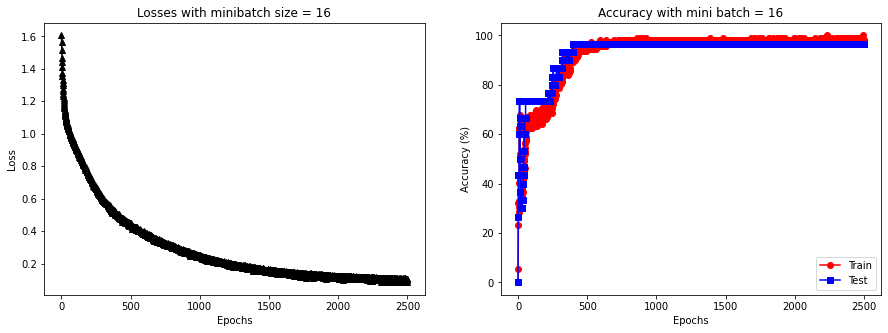

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(losses, 'k^-')
ax[0].set_title(f'Losses with minibatch size = {batch_size}')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(train_acc, 'ro-')
ax[1].plot(test_acc, 'bs-')
ax[1].set_title(f'Accuracy with mini batch = {batch_size}')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train', 'Test'])

plt.show()